<a href="https://colab.research.google.com/github/amalviya13/AdAnalyzer/blob/master/ColorAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline


The type of this input is <class 'numpy.ndarray'>
Shape: (904, 2192, 3)


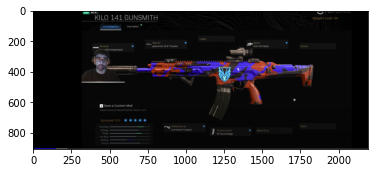

In [12]:
image = cv2.imread('sample_data/sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

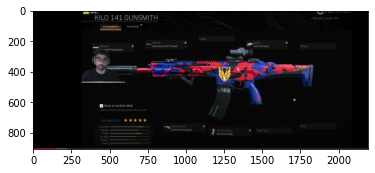

In [17]:

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

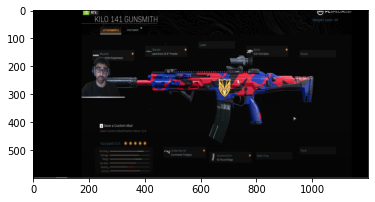

In [18]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [13]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [14]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [15]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([4.726607  , 4.71614706, 4.73150507]),
 array([ 37.02445803,  57.3790995 , 150.31295164]),
 array([203.95885832,  44.35021857,  68.9218308 ]),
 array([125.21971831, 124.73568075, 143.7084507 ]),
 array([87.8621787 , 81.85312118, 83.65458996]),
 array([45.93724311, 42.19719298, 51.39368421]),
 array([218.80114566, 179.24304419, 142.72258592]),
 array([17.77761284, 18.09055243, 19.34365391])]

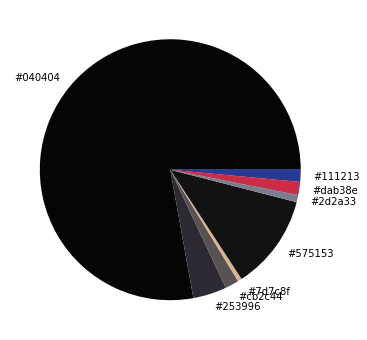

In [20]:
get_colors(get_image('sample_data/sample_image.jpg'), 8, True)